In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt;
from datetime import datetime, timedelta

In [4]:
insideClimate = pd.read_csv("../TheAutomators/GreenhouseClimate.csv")
insideClimate.info()

C:\Users\ntuan\AppData\Local\Temp\ipykernel_9732\274916105.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  insideClimate = pd.read_csv("../TheAutomators/GreenhouseClimate.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %time                        47809 non-null  float64
 1   AssimLight                   47809 non-null  object 
 2   BlackScr                     47809 non-null  object 
 3   CO2ar                        47809 non-null  object 
 4   Cum_irr                      47809 non-null  object 
 5   EC_drain_PC                  47809 non-null  object 
 6   EnScr                        47809 non-null  object 
 7   HumDef                       47809 non-null  object 
 8   PipeGrow                     47809 non-null  object 
 9   PipeLow                      47809 non-null  object 
 10  Rhair                        47809 non-null  object 
 11  Tair                         47809 non-null  object 
 12  Tot_PAR                      47809 non-null  object 
 13  Tot_PAR_Lamps   

In [ ]:
labAna = pd.read_csv("../TheAutomators/LabAnalysis.csv")
tomQuality = pd.read_csv("../TheAutomators/TomQuality.csv")
outsideClimate = pd.read_csv("../Weather/Weather.csv")

In [5]:
tomQuality.rename(columns={"%Time":"%time"},inplace=True)
labAna.rename(columns={"%Time":"%time"},inplace=True)

In [6]:
def convertTime(df:any):
    excel_epoch = datetime(1899, 12, 30)
    df["%time"] = (excel_epoch + pd.to_timedelta(df["%time"], unit='D')).dt.strftime("%Y-%m-%d %H:%M:%S")
    df.set_index("%time")
    

In [7]:

convert_date_list = [insideClimate, outsideClimate,tomQuality, labAna]
for df in convert_date_list:
    convertTime(df)
# Convert the '%time' column to datetime and format it

In [8]:
inNoutClimate = pd.concat([outsideClimate,insideClimate], axis=1)
inNoutClimate = inNoutClimate.loc[:, ~inNoutClimate.columns.duplicated()]

In [9]:
for col in inNoutClimate.columns:
    if(col != "%time"):
        inNoutClimate[col] = pd.to_numeric(inNoutClimate[col], errors='coerce')

In [10]:
inNoutClimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %time                        47809 non-null  object 
 1   AbsHumOut                    47738 non-null  float64
 2   Iglob                        47738 non-null  float64
 3   PARout                       47738 non-null  float64
 4   Pyrgeo                       47738 non-null  float64
 5   RadSum                       47738 non-null  float64
 6   Rain                         47738 non-null  float64
 7   Rhout                        47738 non-null  float64
 8   Tout                         47738 non-null  float64
 9   Winddir                      47738 non-null  float64
 10  Windsp                       47738 non-null  float64
 11  AssimLight                   47738 non-null  float64
 12  BlackScr                     47738 non-null  float64
 13  CO2ar           

In [11]:
inNoutClimate

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,2019-12-16 00:00:00,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,...,NaN,0.0,NaN,25.0,26.0,4.0,NaN,1000.0,NaN,1.2
1,2019-12-16 00:04:59,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
2,2019-12-16 00:09:59,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
3,2019-12-16 00:15:00,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
4,2019-12-16 00:20:00,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47804,2020-05-29 23:39:59,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,...,0.0,0.0,18.0,18.0,18.0,39.0,900.0,900.0,0.0,0.0
47805,2020-05-29 23:44:59,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,...,0.0,0.0,18.0,18.0,18.0,39.0,900.0,900.0,0.0,0.0
47806,2020-05-29 23:50:00,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,...,0.0,0.0,18.0,18.0,18.0,39.0,900.0,900.0,0.0,0.0
47807,2020-05-29 23:55:00,9.177802,0.0,0.000000e+00,-85.0,2992.0,0.0,71.0,15.0,2.0,...,0.0,0.0,18.0,18.0,18.0,39.0,900.0,900.0,0.0,0.0


In [12]:
corrMatrix = inNoutClimate.drop(columns="%time").corr()

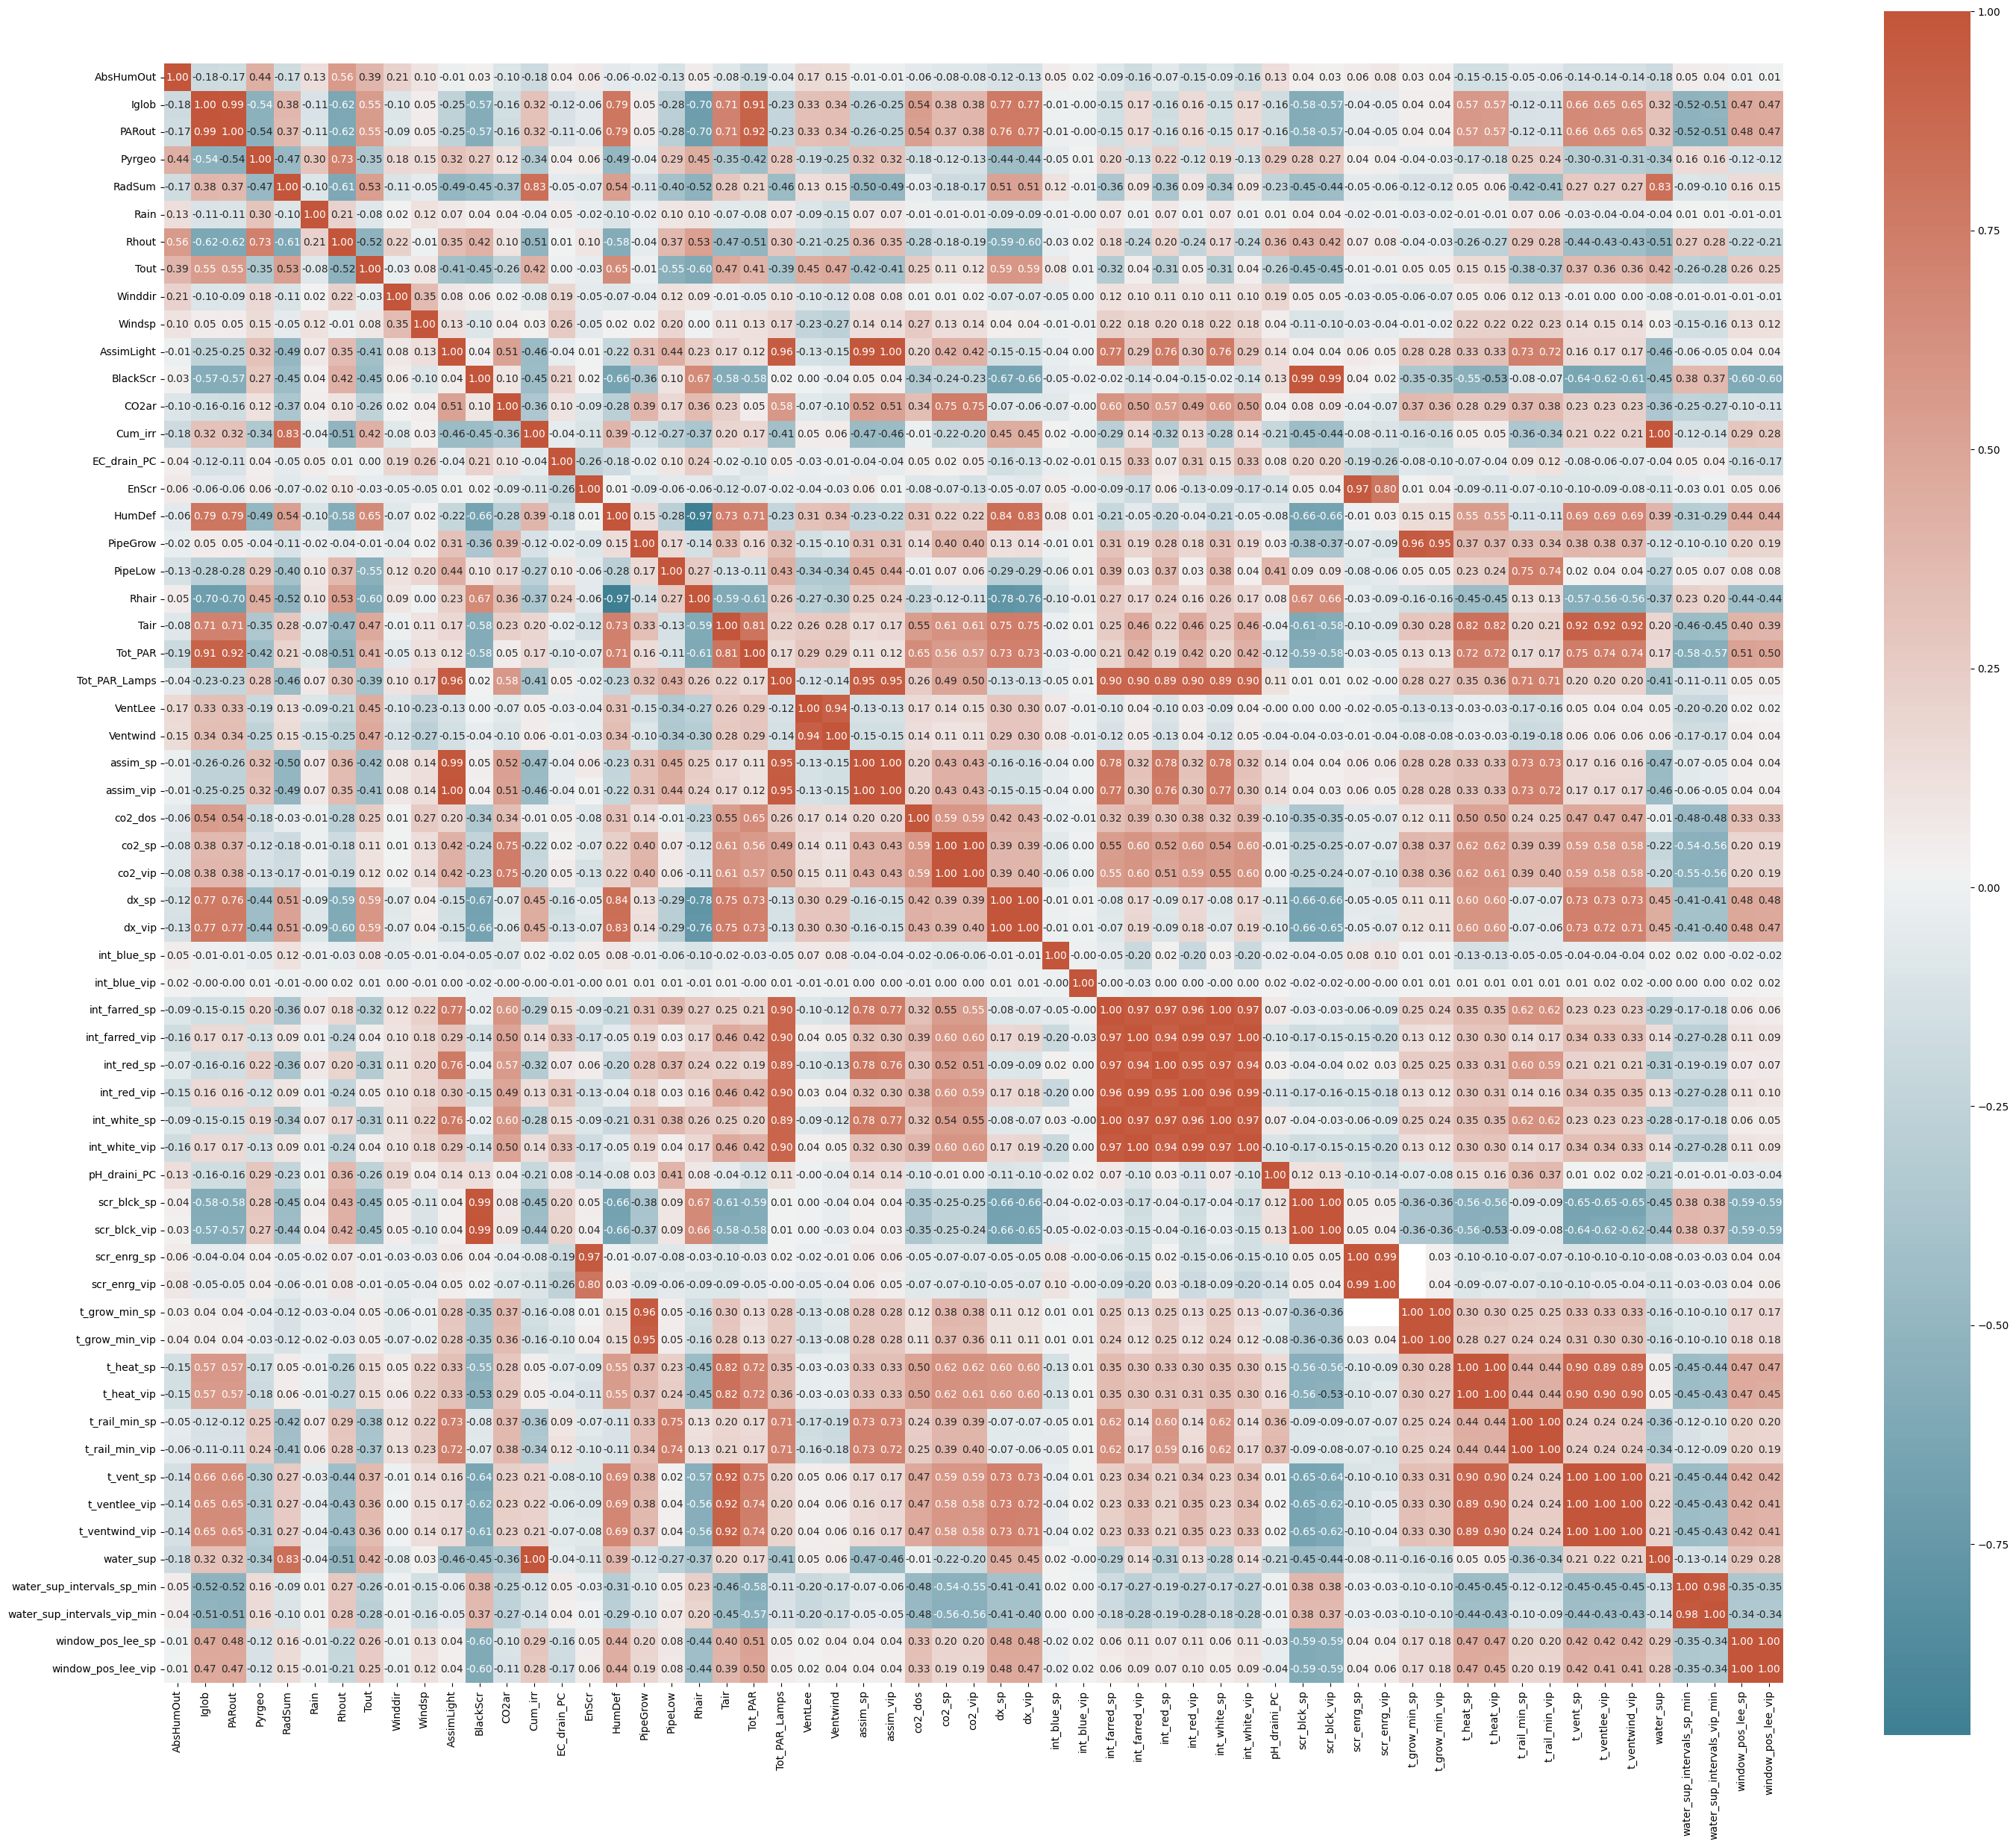

In [13]:
plt.figure(figsize=(35,30))
cmap = sns.diverging_palette(220, 20, as_cmap=True, center="light")
sns.heatmap(data=corrMatrix, annot= True, fmt=".2f", square= True, cmap=cmap)
plt.show()

In [16]:
resource = pd.read_csv("../TheAutomators/Resources.csv")
resource

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,43815,2.71,1.1,0.0,0.007,0.00,0.00
1,43816,0.92,1.0,0.0,0.009,0.00,0.00
2,43817,0.97,1.0,0.7,0.014,0.00,0.00
3,43818,0.10,0.9,0.5,0.025,0.00,0.00
4,43819,2.24,0.8,0.5,0.017,0.76,0.00
...,...,...,...,...,...,...,...
161,43976,0.43,0.0,0.0,0.065,5.40,2.90
162,43977,0.42,0.0,0.0,0.061,5.40,2.69
163,43978,0.44,0.0,0.0,0.088,5.40,2.33
164,43979,0.98,0.0,0.0,0.101,5.76,2.94


In [17]:
resource.rename(columns={"%Time ":"%time"}, inplace=True)
convertTime(resource)
resource

,%time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,2019-12-16 00:00:00,2.71,1.1,0.0,0.007,0.00,0.00
1,2019-12-17 00:00:00,0.92,1.0,0.0,0.009,0.00,0.00
2,2019-12-18 00:00:00,0.97,1.0,0.7,0.014,0.00,0.00
3,2019-12-19 00:00:00,0.10,0.9,0.5,0.025,0.00,0.00
4,2019-12-20 00:00:00,2.24,0.8,0.5,0.017,0.76,0.00
...,...,...,...,...,...,...,...
161,2020-05-25 00:00:00,0.43,0.0,0.0,0.065,5.40,2.90
162,2020-05-26 00:00:00,0.42,0.0,0.0,0.061,5.40,2.69
163,2020-05-27 00:00:00,0.44,0.0,0.0,0.088,5.40,2.33
164,2020-05-28 00:00:00,0.98,0.0,0.0,0.101,5.76,2.94


In [ ]:
df1 = inNoutClimate[["", ]]

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler


In [20]:
print(tf.__version__)

2.10.0


In [21]:
co2_time = inNoutClimate[["%time","co2_dos"]]
co2_time.dropna(inplace=True)
co2 = co2_time["co2_dos"].values
co2 = co2.reshape(-1,1)
print(co2)
training_data_len = int(np.ceil(len(co2)*0.95))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(co2)

train_data = scaled_data[:training_data_len]
X_train, y_train = [], []
scaled_data


[[0.0002]
 [0.0004]
 [0.    ]
 ...
 [0.0004]
 [0.0004]
 [0.0004]]


C:\Users\ntuan\AppData\Local\Temp\ipykernel_19192\3717925560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_time.dropna(inplace=True)


array([[-0.88616165],
       [-0.8258065 ],
       [-0.9465168 ],
       ...,
       [-0.8258065 ],
       [-0.8258065 ],
       [-0.8258065 ]])

In [22]:
for i in range(288, len(train_data)):
    X_train.append(train_data[i-288:i,0])
    y_train.append(train_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.sysconfig.get_build_info())

Num GPUs Available: 1
OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])


In [24]:
pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ntuan\miniconda3\envs\tf-2.10\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [25]:
model = Sequential()
# First layer
model.add(LSTM(64,return_sequences=True, input_shape = (X_train.shape[1],1)))
# Second layer
model.add(LSTM(64, return_sequences= False))
# 3rd layer
model.add(Dense(128, activation="relu"))
# 4th layer
model.add(Dropout(0.5))
# Final Output Layer
model.add(Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics = [RootMeanSquaredError()])

training = model.fit(X_train, y_train, epochs= 5, batch_size=32)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 288, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1411/1411 [==============================]